# Smart Compliance

A fraud reduction strategy for compliance and risk management.


## Image rotation

In [215]:
from deepface import DeepFace
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [216]:
class FaceDetector():

  def __init__(self, cascade_path) -> None:
    file = f"{cv2.data.haarcascades}{cascade_path}"
    self.faceCascade = cv2.CascadeClassifier(file)

  def detect(self, image,
              scaleFactor=1.1,
              minNeighbors=5,
              minSize=(30,30)):

    #function return rectangle coordinates of faces for given image
    return self.faceCascade.detectMultiScale(image,
                                             scaleFactor=scaleFactor,
                                             minNeighbors=minNeighbors,
                                             minSize=minSize)

In [217]:
detector = FaceDetector('haarcascade_frontalface_default.xml')

In [224]:
def detect_faces(image):
  try:
    print("Detecting faces...")
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return detector.detect(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
  except:
    print("Error detecting faces.")
    return []

In [226]:
def has_detected_something(image):
  faces = detect_faces(image)
  print(f"{len(faces)} faces detected.")
  return len(faces) > 0

In [221]:
def rotate_image(image, angle=15, scale=1.0):
  (h, w) = image.shape[:2]
  center = (w / 2, h / 2)
  M = cv2.getRotationMatrix2D(center, angle, scale)
  return cv2.warpAffine(image, M, (w, h))

In [222]:
def rotate_and_detect(image, angle=45, scale=1.0):
  adjusted = 0
  rotation = image
  while has_detected_something(rotation) == False and adjusted < 360:
    adjusted += angle
    rotation = rotate_image(rotation, angle=adjusted, scale=scale)
    images = detect_faces(rotation)
  return rotation

Processing amit_doc_passport_1.png...
Detecting faces...
0 faces detected.
Detecting faces...
Detecting faces...
0 faces detected.
Detecting faces...
Detecting faces...
0 faces detected.
Detecting faces...
Detecting faces...
1 faces detected.

Processing clarice_doc_passport_1.jpeg...
Detecting faces...
2 faces detected.

Processing clarice_doc_id_1.jpeg...
Detecting faces...
1 faces detected.

Processing clarice_doc_license_1.jpeg...
Detecting faces...
2 faces detected.

Processing clarice_doc_op_1.jpeg...
Detecting faces...
1 faces detected.



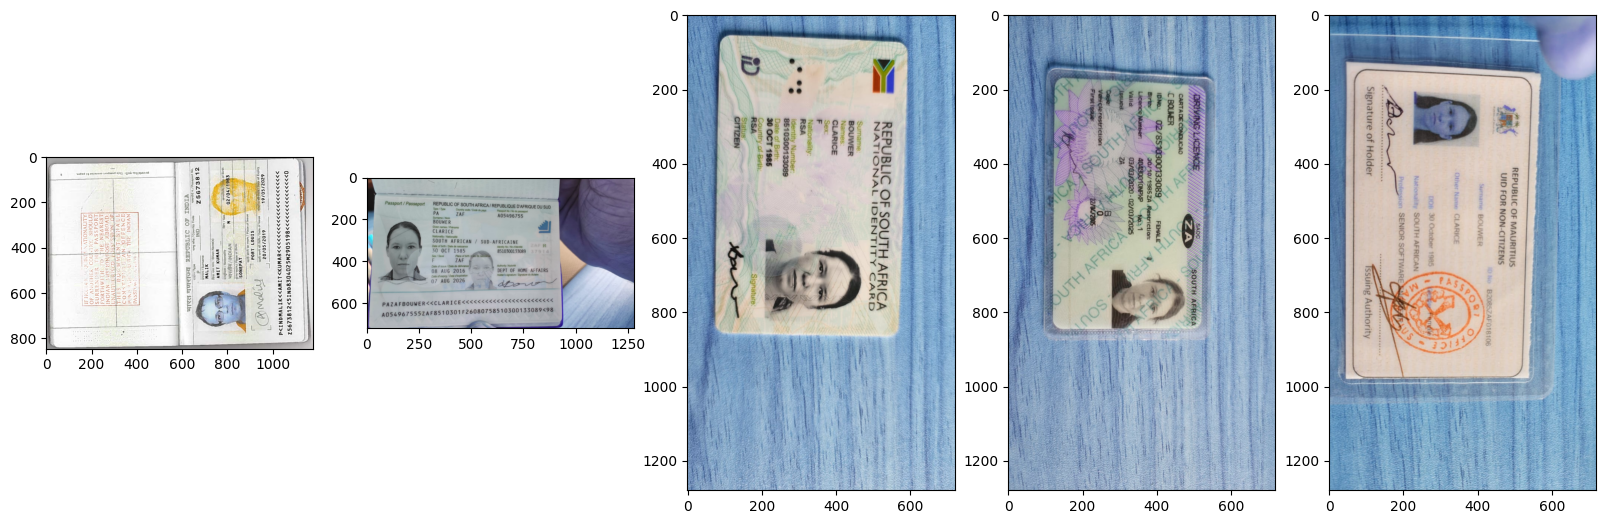

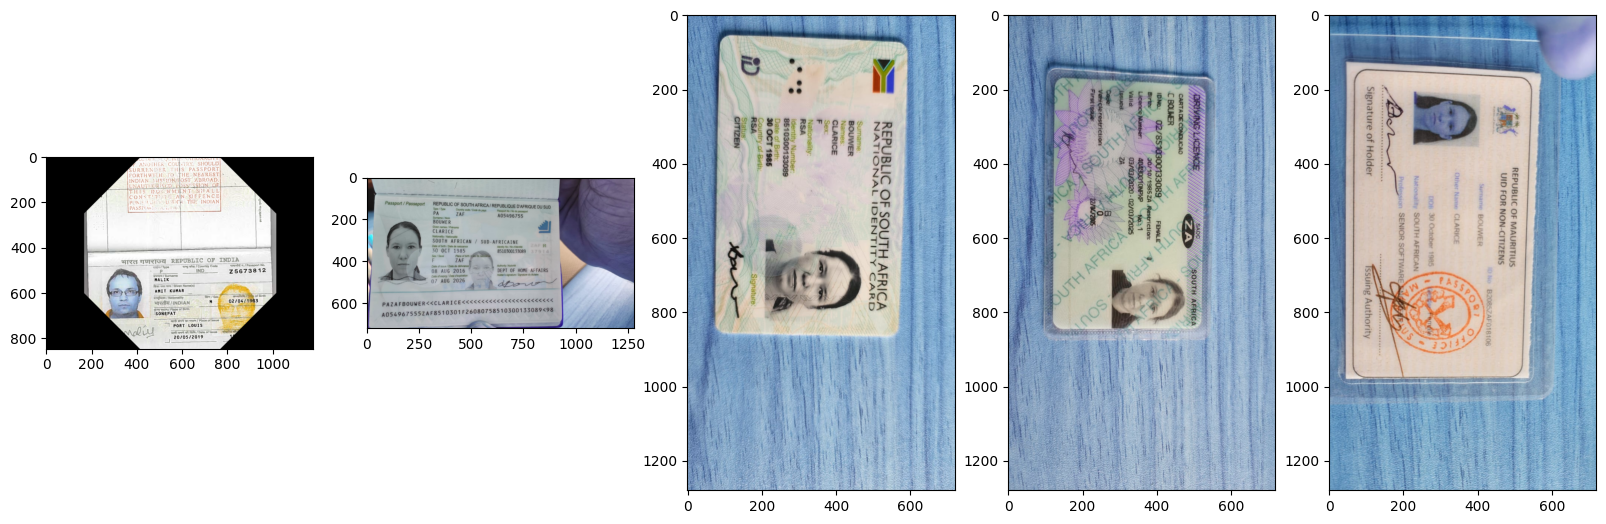

In [228]:
for dirname, _, filenames in os.walk('./raw_data/docs/'):
    figsize = (20,20)
    number_of_files = len(filenames) - 1
    ax1, fig1 = plt.subplots(1, number_of_files, figsize=figsize)
    ax2, fig2 = plt.subplots(1, number_of_files, figsize=figsize)

    index = 0
    for filename in filenames:
        if filename != '.DS_Store':
            print(f"Processing {filename}...")
            frame = cv2.imread(os.path.join(dirname, filename))
            fig1[index].imshow(frame)
            frame = rotate_and_detect(frame, angle=45, scale=1.0)
            fig2[index].imshow(frame)
            index += 1
            print()